# (fordgobike Dataset Exploration)
## by Jood Alqublan

## Introduction

> In this project, I will analyze the period data of  (January 2018) from the Bay Wheels trip dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

In [2]:
#Read the dataset and take a look at the top few rows
fordgobike = pd.read_csv('201801-fordgobike-tripdata.csv')
fordgobike.head() 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [3]:
#look to the information 
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [4]:
#check if there null values
fordgobike.isnull().sum().sum()

15640

In [5]:
#Drop the null values
fordgobike= fordgobike.dropna()

In [6]:
#check if there duplicate values
fordgobike.duplicated().sum()

0

In [7]:
#Test if dropping is ok.
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             86963 non-null  int64  
 1   start_time               86963 non-null  object 
 2   end_time                 86963 non-null  object 
 3   start_station_id         86963 non-null  int64  
 4   start_station_name       86963 non-null  object 
 5   start_station_latitude   86963 non-null  float64
 6   start_station_longitude  86963 non-null  float64
 7   end_station_id           86963 non-null  int64  
 8   end_station_name         86963 non-null  object 
 9   end_station_latitude     86963 non-null  float64
 10  end_station_longitude    86963 non-null  float64
 11  bike_id                  86963 non-null  int64  
 12  user_type                86963 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [8]:
# Separate Start/End time to date and time columns
fordgobike['Start_Dates'] = pd.to_datetime(fordgobike['start_time']).dt.date
fordgobike['Start_Time'] = pd.to_datetime(fordgobike['start_time']).dt.time
fordgobike['End_Dates'] = pd.to_datetime(fordgobike['end_time']).dt.date
fordgobike['End_Time'] = pd.to_datetime(fordgobike['end_time']).dt.time

In [9]:
#Convert date columns from string datatype to datetime 
fordgobike['Start_Dates']= pd.to_datetime(fordgobike['Start_Dates']) 
fordgobike['End_Dates']= pd.to_datetime(fordgobike['End_Dates']) 

In [10]:
#Test if cleaning is ok.
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             86963 non-null  int64         
 1   start_time               86963 non-null  object        
 2   end_time                 86963 non-null  object        
 3   start_station_id         86963 non-null  int64         
 4   start_station_name       86963 non-null  object        
 5   start_station_latitude   86963 non-null  float64       
 6   start_station_longitude  86963 non-null  float64       
 7   end_station_id           86963 non-null  int64         
 8   end_station_name         86963 non-null  object        
 9   end_station_latitude     86963 non-null  float64       
 10  end_station_longitude    86963 non-null  float64       
 11  bike_id                  86963 non-null  int64         
 12  user_type                86963 n

In [11]:
#calculate age based in birth year
years = fordgobike['Start_Dates'].dt.year 
fordgobike['Age'] = years - fordgobike['member_birth_year']

In [12]:
#remove Outlier 
fordgobike = fordgobike[fordgobike['Age'] < 100]

In [13]:
#Test if Age calculated is true 
fordgobike.Age.value_counts()

30.0    4940
33.0    4351
31.0    4216
29.0    4088
36.0    3928
        ... 
84.0       5
79.0       4
78.0       2
18.0       2
80.0       1
Name: Age, Length: 69, dtype: int64

In [14]:
#drop columns that I don't need
fordgobike.drop(['start_time','end_time'], axis=1, inplace=True )

In [15]:
#check if everything is ok before the visualization step
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86847 entries, 0 to 94801
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             86847 non-null  int64         
 1   start_station_id         86847 non-null  int64         
 2   start_station_name       86847 non-null  object        
 3   start_station_latitude   86847 non-null  float64       
 4   start_station_longitude  86847 non-null  float64       
 5   end_station_id           86847 non-null  int64         
 6   end_station_name         86847 non-null  object        
 7   end_station_latitude     86847 non-null  float64       
 8   end_station_longitude    86847 non-null  float64       
 9   bike_id                  86847 non-null  int64         
 10  user_type                86847 non-null  object        
 11  member_birth_year        86847 non-null  float64       
 12  member_gender            86847 n

### What is the structure of your dataset?

> The dataset contains 86963 entries and 19 columns.

### What is/are the main feature(s) of interest in your dataset?

> I will Analyse ford go bike Dataset , and explore if there a relation between variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> user_type,member_gender,Start_Dates,Start_Time,Age,start_station_latitude/longitude,bike_share_for_all_trip

## Univariate Exploration

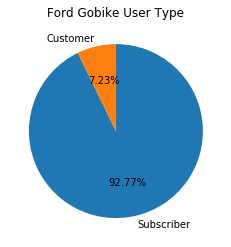

In [16]:
user_counts = fordgobike['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index,autopct='%.2f%%', startangle = 90,
        counterclock = False);
plt.title('Ford Gobike User Type');

#### As it clear 92.77% of users are subscribed and 7.23% are Customer.

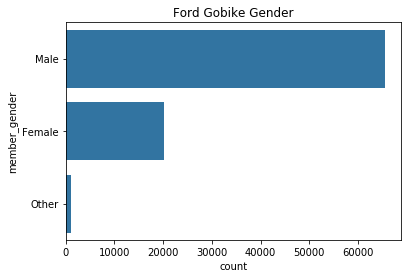

In [17]:
base_color = sb.color_palette()[0]
sb.countplot(data = fordgobike, y = 'member_gender' , color = base_color,);
plt.title('Ford Gobike Gender');

#### It appears that males much more than females in this dataset.

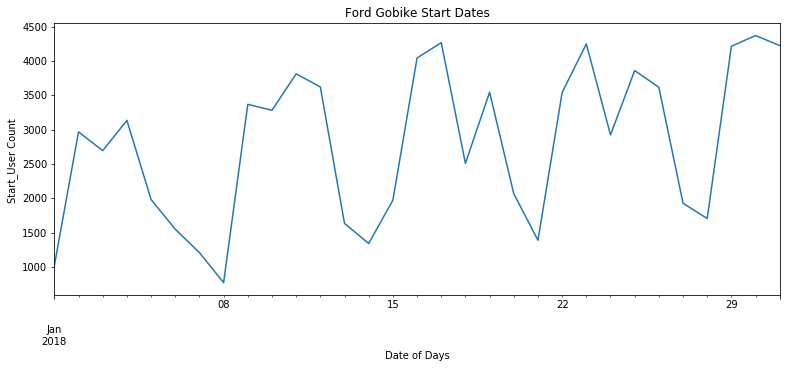

In [27]:
plt.figure(figsize=[13,5])
fordgobike['Start_Dates'].value_counts().sort_index().plot.line()
plt.xlabel('Date of Days')
plt.ylabel('Start_User Count ')
plt.title('Ford Gobike Start Dates');

####  ford gobike Start was increased over the month day.

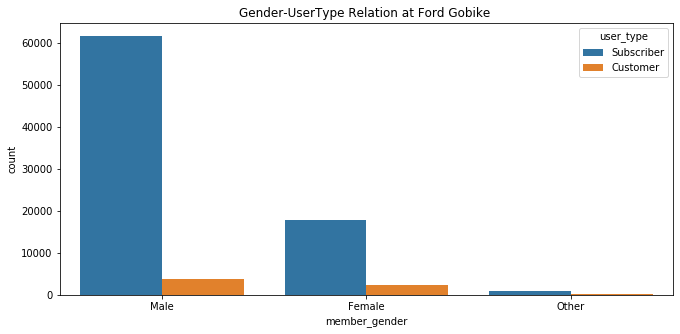

In [19]:
plt.figure(figsize=[11,5])
sb.countplot(data = fordgobike , x = 'member_gender', hue ='user_type');
plt.title('Gender-UserType Relation at Ford Gobike ');

#### Numbers of Males are more than Females, also the numbers of the subscriber are more than a customer.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, i did convert some data type , like date columns from string to datetime.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> start_time, end_time are untidy column. I Separated them to date and time columns to visualize start time.

## Bivariate Exploration

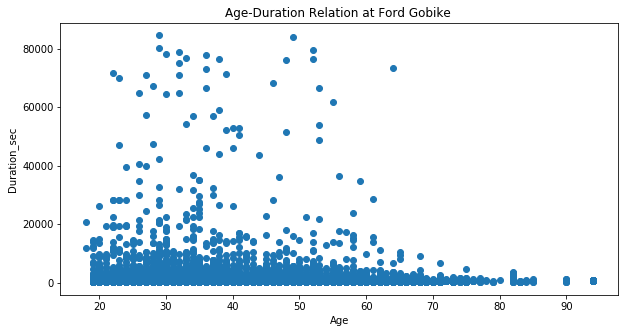

In [20]:
plt.figure(figsize=[10,5])
plt.scatter(data =fordgobike, x = 'Age', y = 'duration_sec');
plt.xlabel('Age');
plt.ylabel('Duration_sec');
plt.title('Age-Duration Relation at Ford Gobike ');

#### It appears that the period of time is decreased with increasing age.

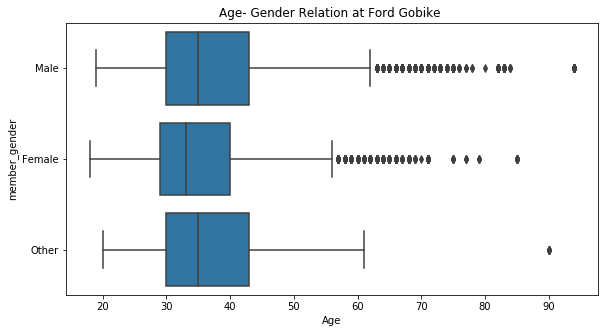

In [21]:
plt.figure(figsize=[21,5])
plt.subplot(1, 2, 2)
sb.boxplot(data = fordgobike , x = 'Age', y = 'member_gender', color = base_color)
plt.title('Age- Gender Relation at Ford Gobike ');

#### Most of the ages are between 20 - 60, and the median for males is 35 and for females 34.

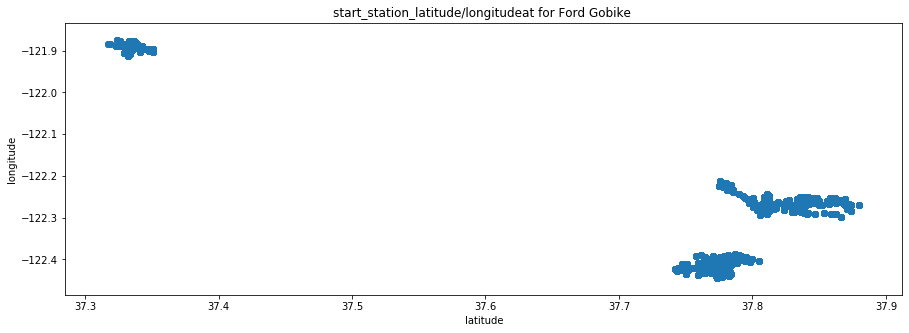

In [22]:
plt.figure(figsize=[15,5])
plt.scatter(data =  fordgobike , x ='start_station_latitude', y = 'start_station_longitude');
plt.title('start_station_latitude/longitudeat for Ford Gobike ');
plt.xlabel('latitude');
plt.ylabel('longitude');

#### It appears that there are three different stations at  Ford Gobike Dataset.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I notice that the results regarding gender are greater for males. 
> #### But I think it's because Simpson's Paradox. As most of the data in the database is for males

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The average age of males who are interested in Ford gobike is greater than the average age of females.

## Multivariate Exploration

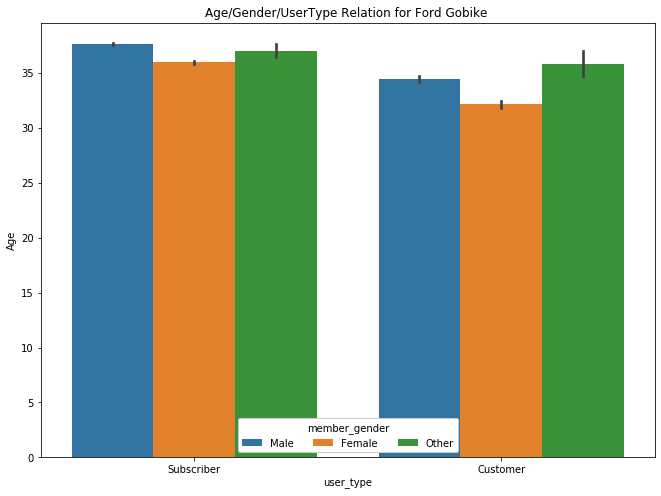

In [23]:
plt.figure(figsize=[11,8])
ax = sb.barplot(data = fordgobike, x = 'user_type', y = 'Age', hue ='member_gender' )
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender');
plt.title('Age/Gender/UserType Relation for Ford Gobike ');

#### The Customer age are little less than subscriber age , and Females less than males.

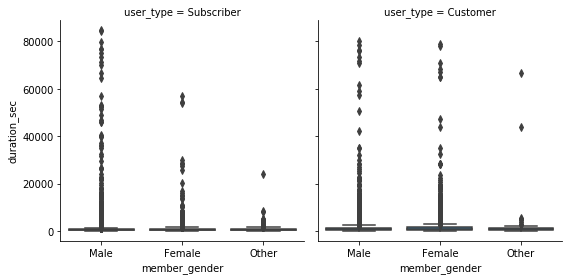

In [24]:
g = sb.FacetGrid(data = fordgobike, col = 'user_type', height = 4);
g.map(sb.boxplot,'member_gender','duration_sec', order=None,);

#### Males take duration time more than Females in both Customer and subscriber

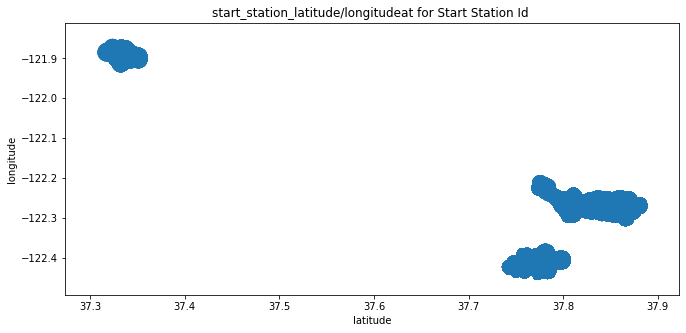

In [25]:
plt.figure(figsize=[11,5])
plt.scatter(data = fordgobike ,x ='start_station_latitude', y = 'start_station_longitude', s = 'start_station_id');
plt.title('start_station_latitude/longitudeat for Start Station Id ');
plt.xlabel('latitude');
plt.ylabel('longitude');

#### This drawing confirms what we saw previously, that there are three starting stations , and two of them are near to each other.

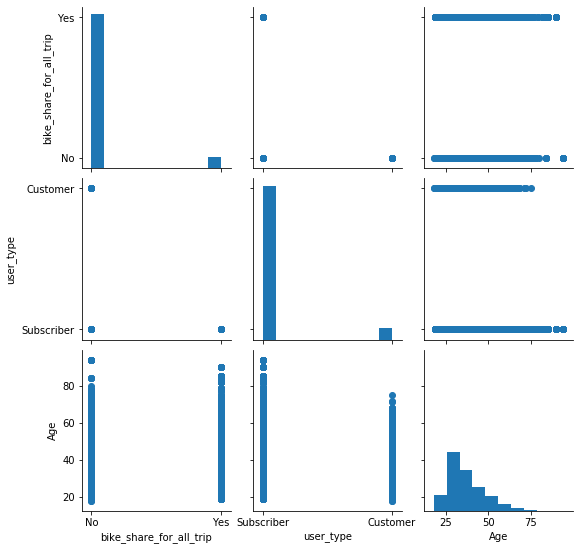

In [26]:
g = sb.PairGrid(data = fordgobike ,vars = ['bike_share_for_all_trip', 'user_type', 'Age']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

#### There is a bit relationship between  NO "bike share for all trip" and increased Age

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 'start_station_latitude/longitudeat for Start Station Id ' drawn are confirms what we saw previously,

### Were there any interesting or surprising interactions between features?

> the relationship between "bike share for all trip" and Age are wondrous .

## Resources

- Udacity courses
- https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns
- https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
- https://www.thetopsites.net/article/52639478.shtml
- https://www.kaggle.com/residentmario/univariate-plotting-with-pandas